The wavefunctions are saved in HDF5 format with filenames structured as `wfc_t*****.h5`, where `*****` denotes the time step of storage. For example, `wfc_t0.500000.h5` indicates that the wavefunction is saved at t = 0.5. We will use these time steps to compute the spectra and fluxes from the saved wavefunctions.

In [5]:
from src.libs.spectrum import specanalysis
import matplotlib.pyplot as plt

S = specanalysis()


## Spectra

### 1. Spectra using binning

1.1 Compressible and incompressible kinetic energy spectra

In [6]:
# <Ti> dentotes the initial time from which the computation of the spectra will start 
# and <Tf> denotes the time upto which averaging of spectra will be computed,
# while <Tf = None> will compute the spectra at the time given to <Ti> 
# <type = "bin"> used to compute spectra using binnig.
k, kei_spec, kec_spec = S.ke_spec(Ti = 600, Tf = None, type='bin')

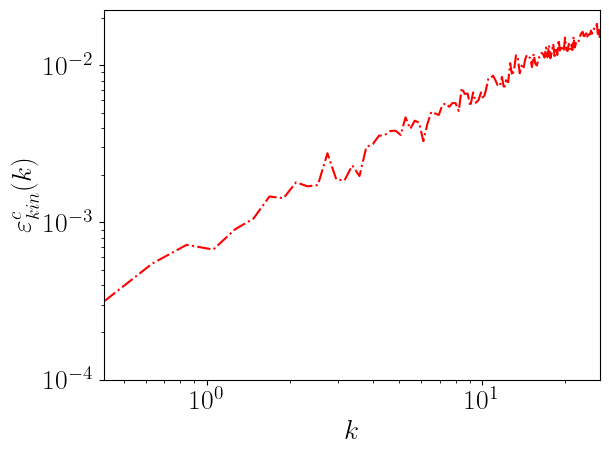

In [7]:
# Compressible kinetic energy spectra at t = 600
plt.loglog(k, kec_spec, 'r-.')
plt.xlim([k[1],k[-1]])
plt.ylim(bottom = 1e-4)
plt.xlabel(r'$k$')
plt.ylabel(r"$\varepsilon^c_{kin}(k)$")
plt.savefig(S.op/'compspec_bin.jpeg', dpi=300, bbox_inches='tight') #Save plot to the postprocesing folder in output directory

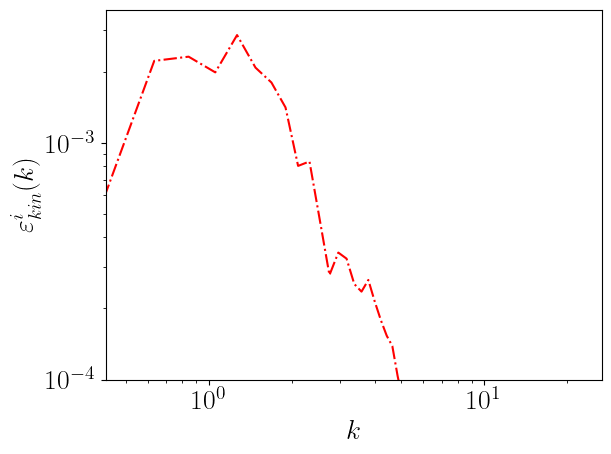

In [8]:
# Inompressible kinetic energy spectra at t = 600
plt.loglog(k, kei_spec, 'r-.')
plt.ylim(bottom = 1e-4)
plt.xlim([k[1],k[-1]])
plt.xlabel(r'$k$')
plt.ylabel(r"$\varepsilon^i_{kin}(k)$")
plt.savefig(S.op/'incompspec_bin.jpeg', dpi=300, bbox_inches='tight') #Save plot to the postprocesing folder in output directory

1.2 Particle number spectra 

Computation of particle number specra in the code is implementd using binning method only.

In [9]:
k, parspec = S.par_spec(Ti = 600, Tf = None)

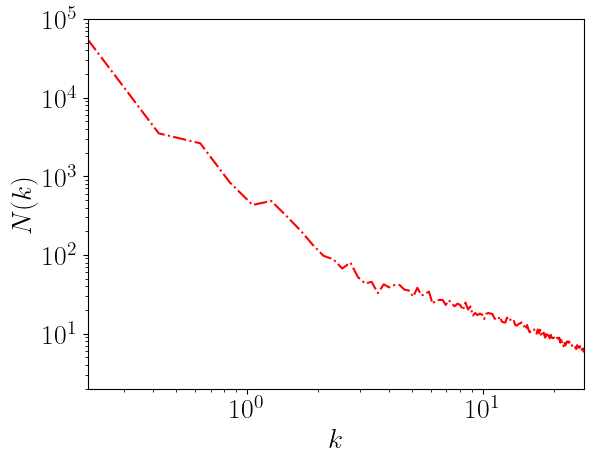

In [10]:
# Parspec Using Binning at t = 600
plt.loglog(k, parspec*256*256, 'r-.')
plt.xlim([k[0],k[-1]])
plt.ylim(2e0, 1e5)
plt.xlabel(r'$k$')
plt.ylabel(r"$N(k)$")
plt.savefig(S.op/"parspec_bin.jpeg", dpi=300, bbox_inches='tight') #Save plot to the postprocesing folder in output directory

### (b) Spectra using angle averaged Weiner-Khinchin theorem

1.1 Compressible and incompressible kinetic energy specta

In [11]:
# <type='resolved'> indicates that the spectra are computed using the angle averaged Weiner-Khinchin theorem.
# <N = 100> denotes that the specra is computed at 100 points equally spaced between 2pi/L to 2pi/L*(N/2) 
# for grid size N and box length L along a specific direction.

k, kei_spec, kec_spec = S.ke_spec(Ti = 600, Tf = None, type='resolved', N = 100)

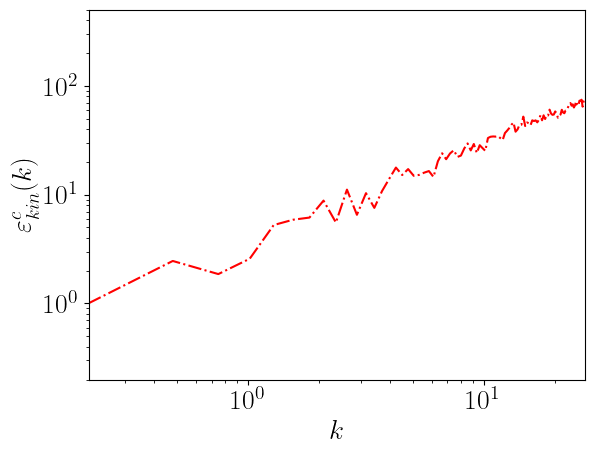

In [12]:
# Compressible kinetic energy spectra at t = 600
plt.loglog(k, kec_spec, 'r-.')
plt.ylim(2e-1, 5e2)
plt.xlim(k[0], k[-1])
plt.xlabel(r'$k$')
plt.ylabel(r"$\varepsilon^c_{kin}(k)$")

plt.savefig(S.op/"res_compspec_bin.jpeg", dpi=300, bbox_inches='tight') #Save plot to the postprocesing folder in output directory

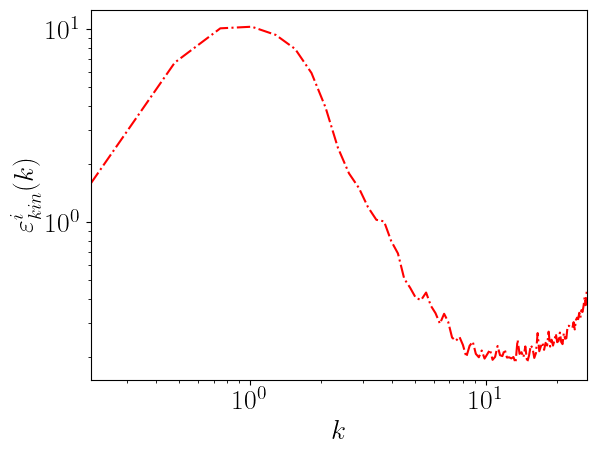

In [13]:
# Inompressible kinetic energy spectra at t = 600
plt.loglog(k, kei_spec, 'r-.')
plt.xlim([k[0], k[-1]])
plt.xlabel(r'$k$')
plt.ylabel(r"$\varepsilon^i_{kin}(k)$")

plt.savefig(S.op/"res_compspec_bin.jpeg", dpi=300, bbox_inches='tight') #Save plot to the postprocesing folder in output directory

### Fluxes

### (a) Kinetic Energy Fluxes

In [14]:
# Here Spectra needed to compute the flux computed using the angle average Weiner-Khinchin theorem.
k, kei_flux, kec_flux = S.ke_flux(Ti = 580, Tf = None, N = 100, type='resolved')

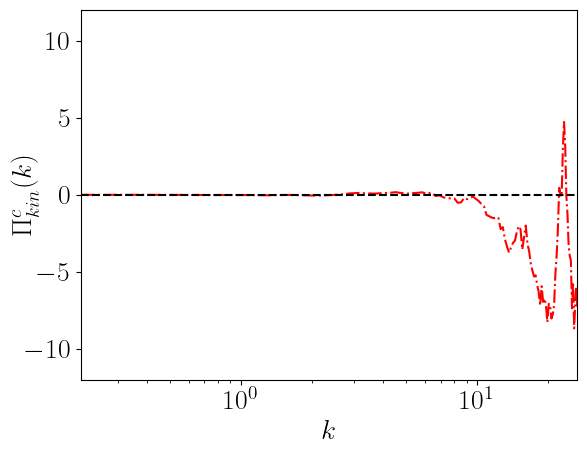

In [15]:
# Compressible kinetic energy flux at t=600
plt.plot(k,  1e-3*kec_flux, 'r-.')
plt.ylim([-12,12])
plt.xlim([k[0], k[-2]])
plt.axhline(y=0,color = 'k', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$k$')
plt.ylabel(r"$\Pi^c_{kin}(k)$", labelpad=-10)

plt.savefig(S.op/"incompflux.jpeg", dpi=300, bbox_inches='tight')# save data to the postprocesing folder in output directory

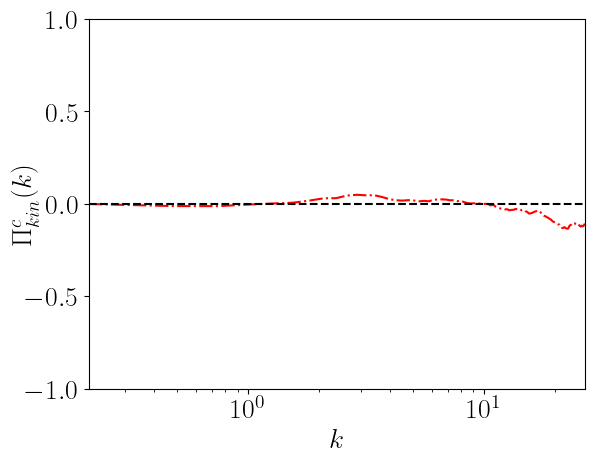

In [16]:
# Incompressible kinetic energy flux at t=600

plt.plot(k, 1e-3*kei_flux, 'r-.')
plt.ylim([-1, 1])
plt.xlim([k[0], k[-1]])
plt.axhline(y=0,color = 'k', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$k$')
plt.ylabel(r"$\Pi^c_{kin}(k)$", labelpad=-10)

plt.savefig(S.op/"compflux.jpeg", dpi=300, bbox_inches='tight')# save data to the postprocesing folder in output directory

### (b) Particle number Flux

In [17]:
k, par_flux = S.par_flux(Ti = 600, Tf = None)

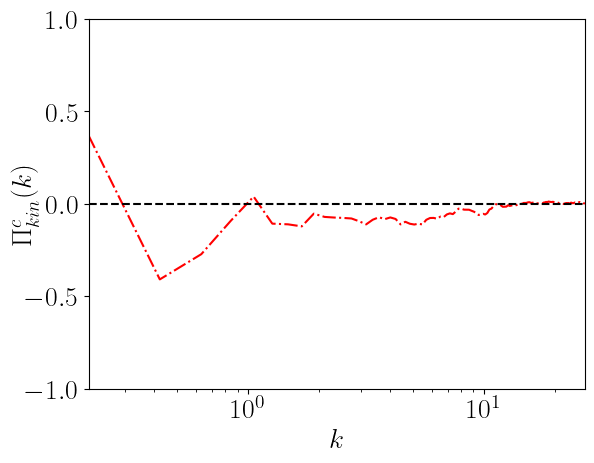

In [18]:
# plt.plot(k, par_flux)
plt.plot(k, 256*par_flux, 'r-.')
plt.xlim([k[0], k[-1]])
plt.ylim([-1,1])
plt.axhline(y=0,color = 'k', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$k$')
plt.ylabel(r"$\Pi^c_{kin}(k)$", labelpad=-10)
plt.savefig(S.op/"parflux.jpeg", dpi=300, bbox_inches='tight')
